### Description / Задание:

In this competition your task will be to predict the mean math exam result (from 0 to 100 points) for students of tutors in test.csv. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).    

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

### Target / Целевая переменная:

mean_exam_points / средний балл

### Evaluation / Метрика для оценки:


The evaluation metric is Coefficient of determination / Метрика для оценки – Коэффициент детерминации.

### Описание датасета:

* **Id** - идентификационный номер
* **age** - возраст   
* **years_of_experience** - стаж   
* **lesson_price** - цена урока   
* **qualification** – квалификация    
* **physics** – физика    
* **chemistry** – химия  
* **biology** – биология   
* **english** – английский  
* **geography** – география   
* **history** – история    
* **mean_exam_points** – средний балл

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Пути к директориям и файлам


In [3]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'
RES_PATH = './result_submission.csv'

### Загрузка данных

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

### Изучение датасета

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [8]:
train_df.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.00000,0.00000,1400.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,61
1,1,48.00000,4.00000,2850.00000,3.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,76
2,2,39.00000,0.00000,1200.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53
3,3,46.00000,5.00000,1400.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,54
4,4,43.00000,1.00000,1500.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,57


In [9]:
test_df.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.00000,3.00000,1050.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,10001,43.00000,3.00000,1850.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,10002,52.00000,1.00000,1550.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,10003,57.00000,6.00000,2900.00000,3.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
4,10004,44.00000,4.00000,3150.00000,3.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [10]:
train_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,4999.50000,45.87800,1.98680,1699.10500,1.71950,0.37500,0.13290,0.10960,0.05370,0.03210,0.01940,63.73730
std,2886.89568,8.04393,1.77221,524.88665,0.79226,0.48415,0.33948,0.31241,0.22544,0.17627,0.13793,14.70557
min,0.00000,23.00000,0.00000,200.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.00000
25%,2499.75000,40.00000,0.00000,1300.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53.00000
50%,4999.50000,46.00000,2.00000,1500.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,63.00000
75%,7499.25000,51.00000,3.00000,2150.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,74.00000
max,9999.00000,68.00000,10.00000,3950.00000,4.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,100.00000


In [11]:
test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,14999.50000,45.97280,1.98000,1697.09500,1.70940,0.38130,0.12350,0.12010,0.05600,0.03140,0.01840
std,2886.89568,7.95628,1.78329,524.26262,0.79348,0.48573,0.32903,0.32509,0.22993,0.17440,0.13440
min,10000.00000,23.00000,0.00000,200.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,12499.75000,41.00000,0.00000,1300.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,14999.50000,46.00000,2.00000,1500.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,17499.25000,51.00000,3.00000,2150.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,19999.00000,68.00000,10.00000,4050.00000,4.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


Видно, что данные без пропусков, без существенных выбросов, в дополнительных действиях по очистке не нуждаются.

### Корелляция признаков


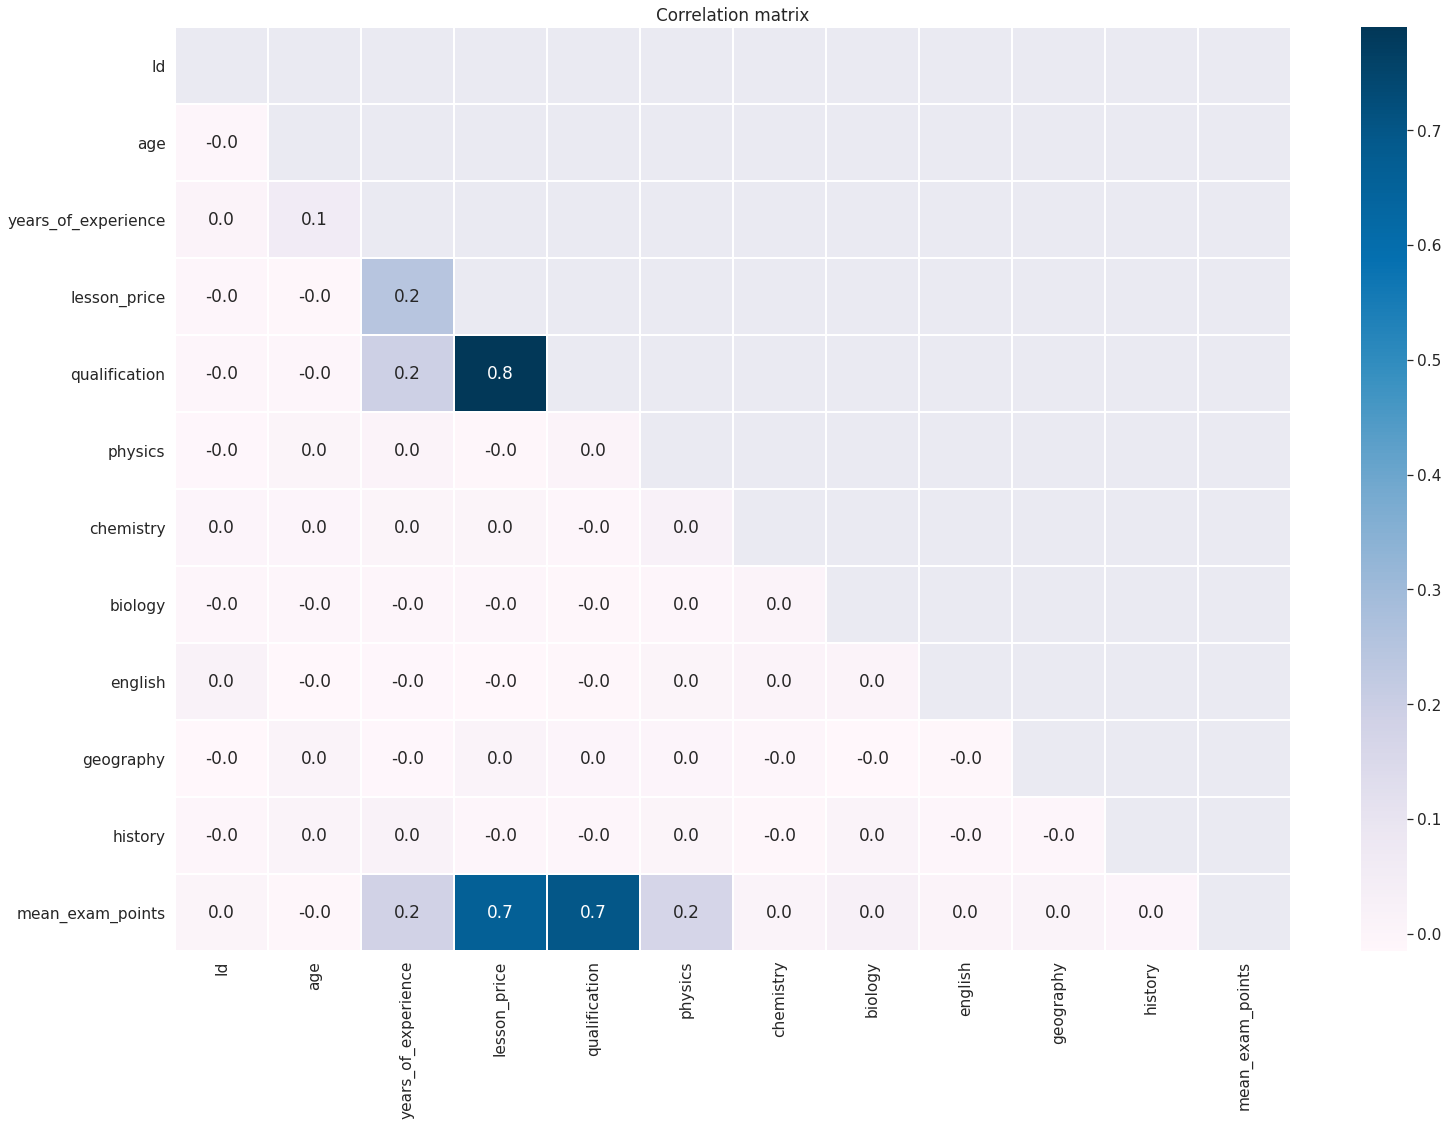

In [18]:
df_num_features = pd.get_dummies(train_df)
num_features = pd.DataFrame(df_num_features)

corr = num_features.corr()
plt.figure(figsize = (25, 17))
sns.set(font_scale=1.4)
sns.heatmap(num_features.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='PuBu')
plt.title('Correlation matrix')
plt.show();

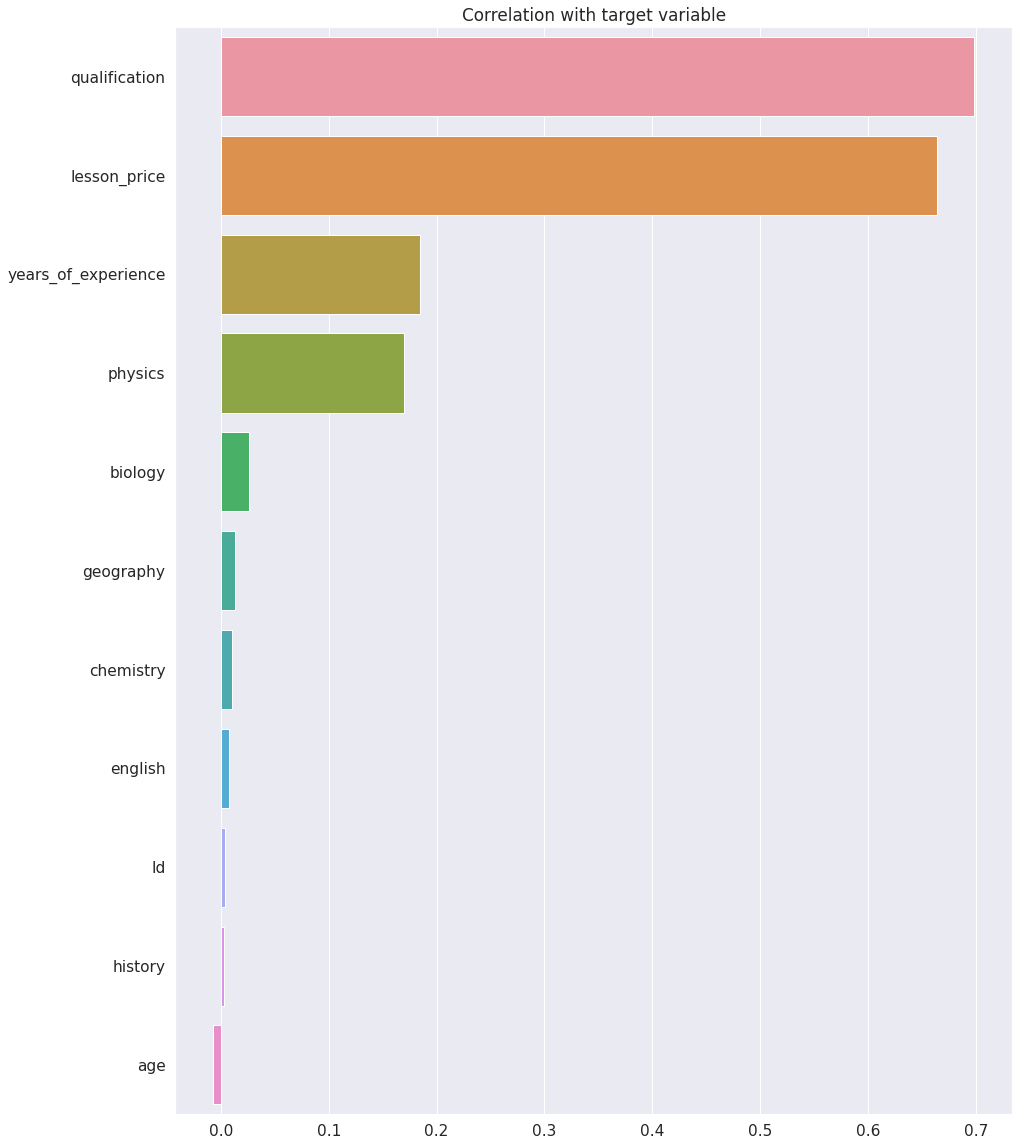

In [19]:
TARGET_NAME = 'mean_exam_points'

corr_with_target = train_df.corr()[TARGET_NAME].sort_values(ascending=False)[1:]

plt.figure(figsize=(15, 20))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

### Визуализация распределения количественных признаков

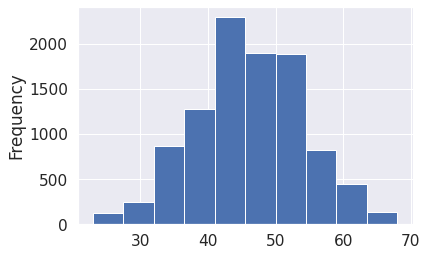

In [28]:
(train_df['age']).plot(kind="hist");

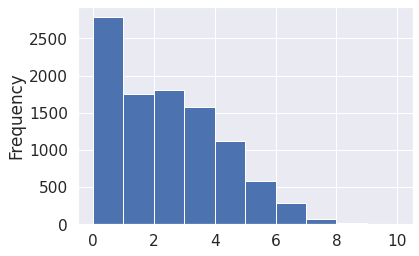

In [29]:
(train_df['years_of_experience']).plot(kind="hist");

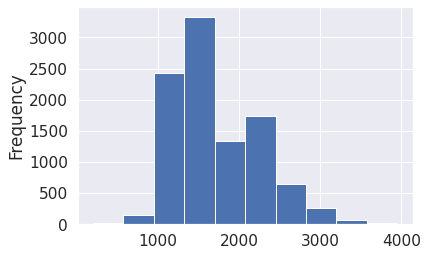

In [30]:
(train_df['lesson_price']).plot(kind="hist");

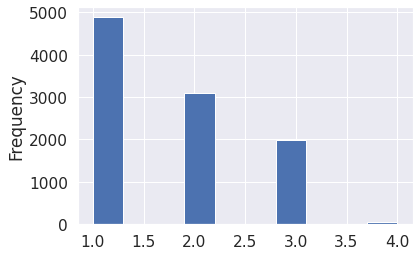

In [31]:
(train_df['qualification']).plot(kind="hist");

### Генерация дополнительных признаков.

Для повышения качества предсказания сгенерируем несколько дополнительных признаков, и обучим модели с разными их комбинациями. 
На реальных данных стоило бы разделить глупые признаки например на "точные" и "гуманитарные" науки, а так же сгенерировать признак, сколько предметов дает репетитор. Но на этом датасете данные явно сгенерированы случайно, один и тот же преподаватель может обучать, например, английскому и геометрии. Так что здесь подобный "жизненный" подход нужного результата не даст.

In [35]:
def gen_square_feature(df, feature):
    '''
    Добавляет признак, возведенный в квадрат
    '''
    df[f'square_{feature}'] =  df[feature] * df[feature]

def gen_composition_feature(df, feature1, feature2):
    '''
    Добавляет произведение признаков
    '''
    df[f'comp_{feature1}_{feature2}'] =  df[feature1] * df[feature2]
    
def gen_devidion_feature(df, dividend, divisor):
    '''
    Добавляет частное признаков
    '''
    df.loc[df[divisor] == 0, divisor] = 0.0001
    df[f'dev_{dividend}_{divisor}'] =  df[dividend] / df[divisor]



def gen_service_feature(df):
    '''
    Добавляет признак сервис, в зависимости от цены и квалификации.
    '''
    df['service'] = 1
    df.loc[(df['qualification'] >= 3) & (df['lesson_price'] >= 3500), 'service'] = 5
    df.loc[((df['qualification'] < 3) & (df['qualification'] >= 2)) & ((df['lesson_price'] < 3500) & (df['lesson_price'] >= 2500)), 'service'] = 4
    df.loc[((df['qualification'] < 2) & (df['qualification'] >= 1)) & ((df['lesson_price'] < 2500) & (df['lesson_price'] >= 1500)), 'service'] = 3
    df.loc[(df['qualification'] < 1) & (df['lesson_price'] < 1000), 'service'] = 2
    
def gen_raiting_feature(df):
    '''
    Добавляет признак рейтинг в зависимости от квалификации и  стажа.
    '''
    df['rating'] = 1
    df.loc[(df['qualification'] >= 3) & (df['years_of_experience'] >= 8), 'rating'] = 5
    df.loc[((df['qualification'] < 3) & (df['qualification'] >= 2)) & ((df['years_of_experience'] < 8) & (df['years_of_experience'] >= 6)), 'rating'] = 4
    df.loc[((df['qualification'] < 2) & (df['qualification'] >= 1)) & ((df['years_of_experience'] < 6) & (df['years_of_experience'] >= 4)), 'rating'] = 3
    df.loc[(df['qualification'] < 1) & (df['years_of_experience'] < 2), 'rating'] = 2

In [52]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

gen_square_feature(test_df, 'lesson_price')
gen_square_feature(train_df, 'lesson_price')

gen_square_feature(test_df, 'qualification')
gen_square_feature(train_df, 'qualification')

####

gen_composition_feature(test_df, 'years_of_experience', 'lesson_price')
gen_composition_feature(train_df, 'years_of_experience', 'lesson_price')

gen_composition_feature(test_df, 'years_of_experience', 'qualification')
gen_composition_feature(train_df, 'years_of_experience', 'qualification')

gen_composition_feature(test_df, 'lesson_price', 'qualification')
gen_composition_feature(train_df, 'lesson_price', 'qualification')

####

gen_devidion_feature(test_df, 'lesson_price', 'qualification')
gen_devidion_feature(train_df, 'lesson_price', 'qualification')

gen_devidion_feature(test_df, 'lesson_price', 'years_of_experience')
gen_devidion_feature(train_df, 'lesson_price', 'years_of_experience')

gen_devidion_feature(test_df, 'years_of_experience', 'qualification')
gen_devidion_feature(train_df, 'years_of_experience', 'qualification')

####

gen_service_feature(test_df)
gen_service_feature(train_df)

gen_raiting_feature(test_df)
gen_raiting_feature(train_df)

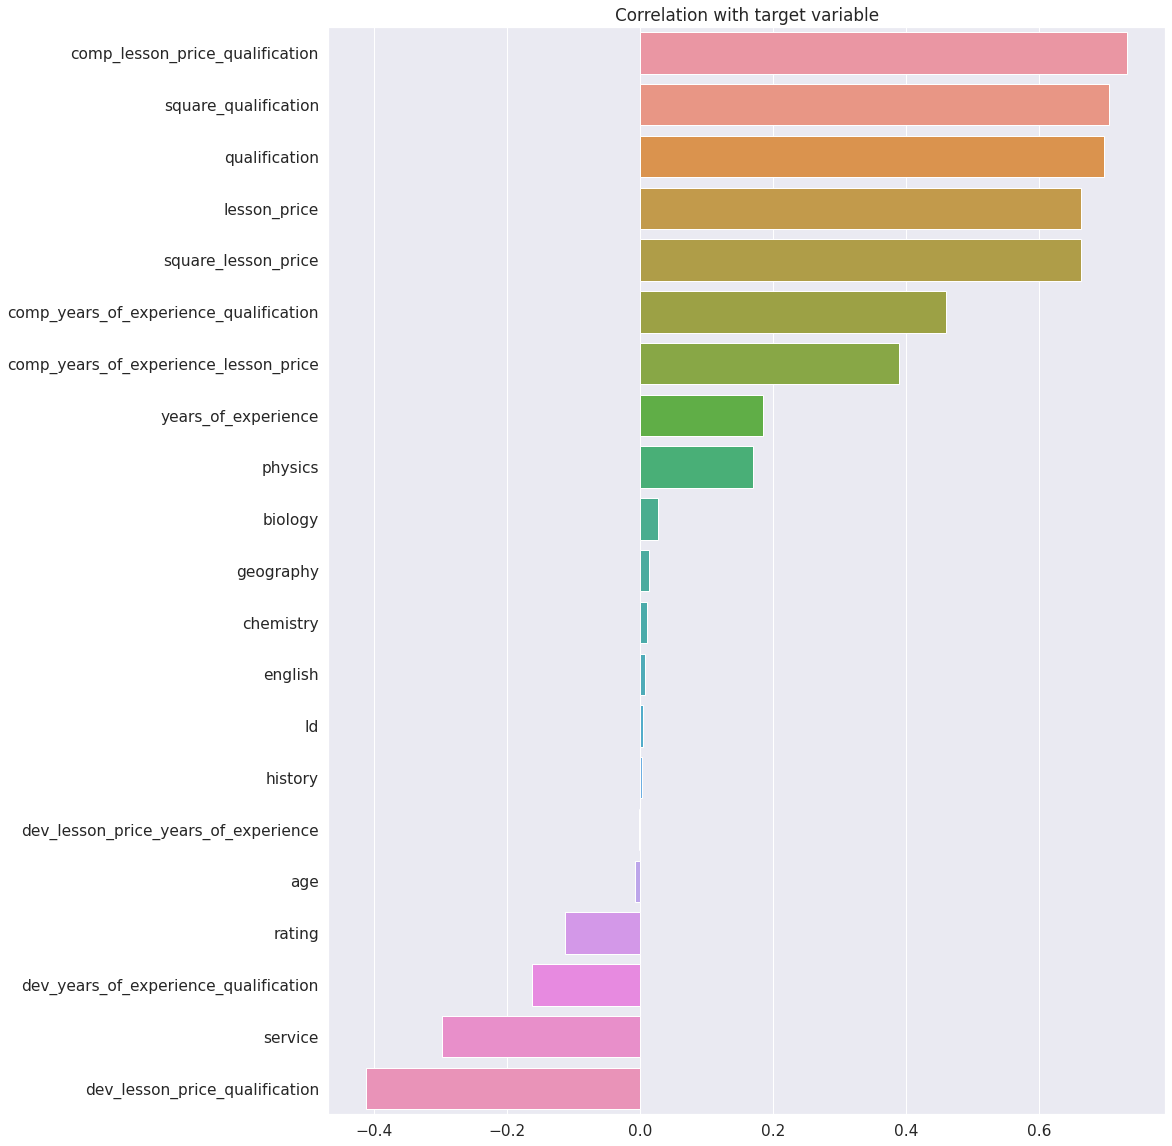

In [53]:
TARGET_NAME = 'mean_exam_points'

corr_with_target = train_df.corr()[TARGET_NAME].sort_values(ascending=False)[1:]

plt.figure(figsize=(15, 20))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [76]:
train_df.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,square_lesson_price,square_qualification,comp_years_of_experience_lesson_price,comp_years_of_experience_qualification,comp_lesson_price_qualification,dev_lesson_price_qualification,dev_lesson_price_years_of_experience,dev_years_of_experience_qualification,service,rating
0,0,40.00000,0.00010,1400.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,61,1960000.00000,1.00000,0.00000,0.00000,1400.00000,1400.00000,14000000.00000,0.00010,1,1
1,1,48.00000,4.00000,2850.00000,3.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,76,8122500.00000,9.00000,11400.00000,12.00000,8550.00000,950.00000,712.50000,1.33333,1,1
2,2,39.00000,0.00010,1200.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53,1440000.00000,1.00000,0.00000,0.00000,1200.00000,1200.00000,12000000.00000,0.00010,1,1
3,3,46.00000,5.00000,1400.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,54,1960000.00000,1.00000,7000.00000,5.00000,1400.00000,1400.00000,280.00000,5.00000,1,3
4,4,43.00000,1.00000,1500.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,57,2250000.00000,1.00000,1500.00000,1.00000,1500.00000,1500.00000,1500.00000,1.00000,3,1


### Реализация градиентного бустинга

In [45]:
# Реализуем класс узла
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [46]:
# И класс терминального узла (листа)
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        
        # Расчет среднего значения в листе
        prediction = np.mean(self.labels)
        return prediction 

In [47]:
# Реализуем класс дерева
class Tree:

    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.tree = None


    # В случае регрессии разброс будет характеризоваться дисперсией
    def variance(self, labels):
        return np.var(labels)


    # Расчет качества
    def quality(self, left_labels, right_labels, current_variance):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        
        return current_variance - p * self.variance(left_labels) - (1 - p) * self.variance(right_labels)

    
    # Разбиение датасета в узле
    def split(self, data, labels, index, t):
    
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
            
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
            
        return true_data, false_data, true_labels, false_labels

    
    # Нахождение наилучшего разбиения
    def find_best_split(self, data, labels):
        
        #  обозначим минимальное количество объектов в узле
        min_leaf = 5

        current_variance = self.variance(labels)

        best_quality = 0
        best_t = None
        best_index = None
        
        n_features = data.shape[1]
        
        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
            
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue
                
                current_quality = self.quality(true_labels, false_labels, current_variance)
                
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index
    

    # Построение дерева с помощью рекурсивной функции
    def build_tree(self, data, labels, max_depth, depth=0):

        quality, t, index = self.find_best_split(data, labels)

        # Прекращаем рекурсию, когда нет прироста в качества или достигнута
        # максимальная глубина дерева
        if quality == 0 or depth >= max_depth:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, max_depth, depth+1)
        false_branch = self.build_tree(false_data, false_labels, max_depth, depth+1)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)
    

    def predict_target(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_target(obj, node.true_branch)
        else:
            return self.predict_target(obj, node.false_branch)
    

    def predict(self, data):
    
        values = []
        for obj in data:
            prediction = self.predict_target(obj, self.tree)
            values.append(prediction)
        return values
    

    # Строим дерево
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels, self.max_depth)
        return self

In [48]:
# Реализуем класс для градиентного бустинга
class GB:
    def __init__(self, n_trees, max_depth, coefs, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = coefs
        self.eta = eta
        self.trees = []


    def bias(self, y, z):
        return (y - z)

    def fit(self, X_train, y_train):
        
        # Деревья будем записывать в список
        trees = []

        for i in range(self.n_trees):
            tree = Tree(max_depth=self.max_depth)         

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)
                
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, self.bias(y_train, target))
            self.trees.append(tree)
            
        return self
    
    
    def predict(self, X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [54]:
# Функция вычисления метрики R2
def R2(y_pred, y_true):
    numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0, dtype=np.float64)
    return 1 - (numerator / denominator)

### Обучение модели и предсказание.

In [205]:
# features = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history', 'square_lesson_price', 'square_qualification', 'comp_years_of_experience_lesson_price', 'comp_years_of_experience_qualification', 'comp_lesson_price_qualification', 'dev_lesson_price_qualification', 'dev_lesson_price_years_of_experience', 'dev_years_of_experience_qualification', 'service', 'rating']
# Все признаки 0.6367

# features = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'square_lesson_price', 'square_qualification', 'comp_years_of_experience_lesson_price', 'comp_years_of_experience_qualification', 'comp_lesson_price_qualification', 'dev_lesson_price_qualification', 'dev_lesson_price_years_of_experience', 'dev_years_of_experience_qualification', 'service', 'rating']
# Из dummies только physics 0.6623

# features = ['age', 'years_of_experience', 'lesson_price', 'physics', 'square_qualification', 'comp_years_of_experience_lesson_price', 'dev_lesson_price_qualification', 'dev_lesson_price_years_of_experience', 'dev_years_of_experience_qualification', 'service', 'rating']
# 0.6670

# features = ['age', 'years_of_experience', 'lesson_price', 'physics', 'square_qualification', 'comp_years_of_experience_lesson_price', 'dev_lesson_price_qualification', 'dev_lesson_price_years_of_experience', 'dev_years_of_experience_qualification', 'service', 'rating']
# 0.6681 n=15 md = 4

features = [ 'years_of_experience', 'lesson_price', 'physics', 'qualification', 'comp_years_of_experience_lesson_price', 'dev_lesson_price_qualification', 'dev_lesson_price_years_of_experience', 'dev_years_of_experience_qualification', 'service', 'rating']
# 0.66899 n=18 coefs = 0.8 md = 4 eta = 0.4 random_state = 28



In [206]:
X = train_df[features].values
y = train_df[TARGET_NAME].values

In [207]:
# def calc_std_feat(x):
#     res = (x - x.mean()) / x.std()
#     return res

In [208]:
# X_st = X.copy()
# X_st[2, :] = calc_std_feat(X[2, :])

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 28) 

In [290]:
# Число деревьев в ансамбле
n_trees = 18

coefs = [0.8] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 0.4

In [291]:
gb = GB(n_trees, max_depth, coefs, eta)
# Обучение модели
gb.fit(X_train, y_train)
# Предскажем значения на тестовом наборе
y_pred_test = gb.predict(X_test)

In [292]:
R2(y_pred_test, y_test)

0.6689971874052287

In [293]:
gb_final = GB(n_trees, max_depth, coefs, eta)
gb_final.fit(X, y)

In [294]:
X_test = test_df[features].values

In [295]:
y_pred_test = gb_final.predict(X_test)

### Cохранение результатов


In [297]:
submissions = pd.concat([test_df['Id'], pd.Series(y_pred_test)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

submissions.to_csv(RES_PATH, index=False, encoding='utf-8')